In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the input data (X) and the corresponding XOR results (Y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

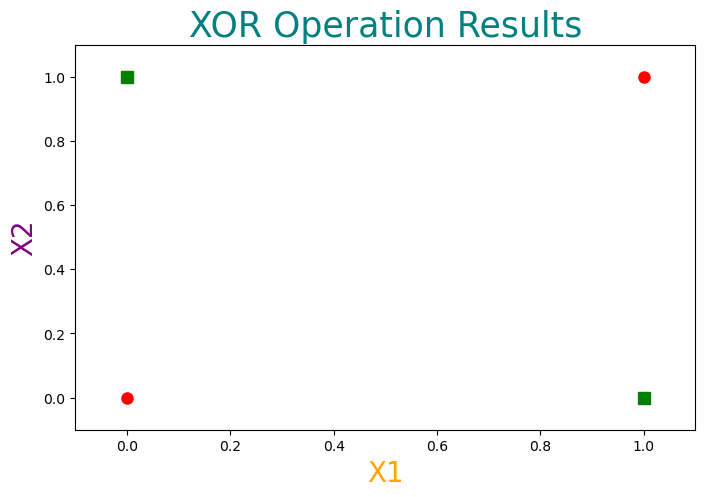

In [3]:
# Plot the results of XOR operations
plt.figure(figsize=(8,5))

# Plot the data points
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X[i, 0], X[i, 1], 'ro', markersize=8)
    else:
        plt.plot(X[i, 0], X[i, 1], 'gs', markersize=8)

plt.xlabel("X1", size = 20, color= "orange")
plt.ylabel("X2", size = 20, color= "purple")
plt.title("XOR Operation Results", size = 25, color= "teal")
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

In [4]:
# Define the neural network architecture
input_size = 2
hidden_size = 2
output_size = 1

In [5]:
# Initialize the weights and biases with random values
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(output_size)

In [6]:
# Define the activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

In [7]:
# Train the neural network for a specified number of epochs
epochs = 10000
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_output = sigmoid(np.dot(X, W1) + b1)
    output_layer_output = sigmoid(np.dot(hidden_layer_output, W2) + b2)

    # Calculate the loss (accuracy-based)
    accuracy = np.mean(np.round(output_layer_output) == Y)
    loss = (1 - accuracy) * Y.shape[0]

    # Backpropagation
    output_error = Y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_error = output_delta.dot(W2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
    
    # Update the weights and biases
    W2 += hidden_layer_output.T.dot(output_delta)
    b2 += np.sum(output_delta, axis=0)
    W1 += X.T.dot(hidden_delta)
    b1 += np.sum(hidden_delta, axis=0)

    if epoch % 1000 == 0:
        print(f"\nEpoch- {epoch}:\n\tLoss: {loss} (out of {Y.shape[0]})")
        print("------------------------------")


Epoch- 0:
	Loss: 2.0 (out of 4)
------------------------------

Epoch- 1000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 2000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 3000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 4000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 5000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 6000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 7000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 8000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 9000:
	Loss: 0.0 (out of 4)
------------------------------


In [8]:
# Print the final prediction made by the model
print("Final Prediction:")
for i in range(X.shape[0]):
    hidden_output = sigmoid(np.dot(X[i], W1) + b1)
    output = sigmoid(np.dot(hidden_output, W2) + b2)
    print("\tInput:", X[i], "Output:", np.round(output[0]))

Final Prediction:
	Input: [0 0] Output: 0.0
	Input: [0 1] Output: 1.0
	Input: [1 0] Output: 1.0
	Input: [1 1] Output: 0.0


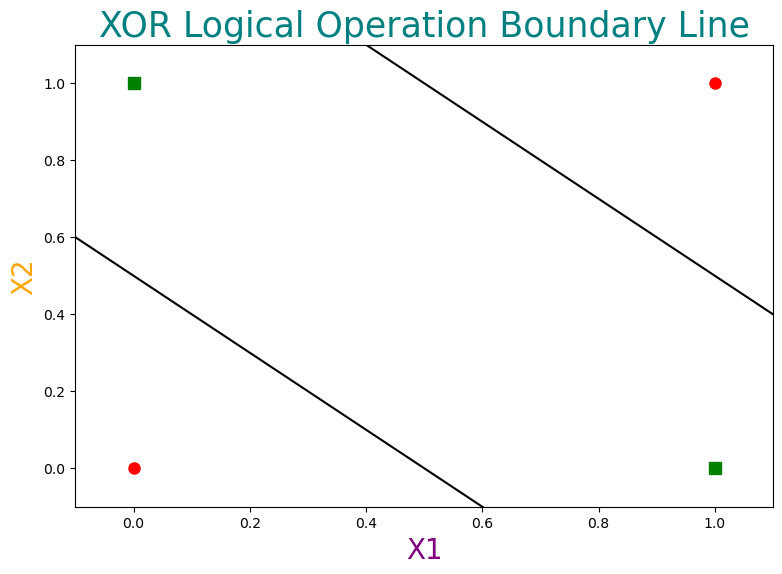

In [9]:
# Define the equations for the boundary lines
x1_line = np.linspace(-0.1, 1.5, 100)
x2_line1 = 0.50 - x1_line
x2_line2 = 1.50 - x1_line

# Plot the decision boundary lines
plt.figure(figsize=(9, 6))
plt.plot(x1_line, x2_line1, color="black")
plt.plot(x1_line, x2_line2, color="black")

# Plot the data points
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X[i, 0], X[i, 1], 'ro', markersize=8)
    else:
        plt.plot(X[i, 0], X[i, 1], 'gs', markersize=8)

plt.xlabel("X1", size=20, color="purple")
plt.ylabel("X2", size=20, color="orange")
plt.title("XOR Logical Operation Boundary Line", size=25, color="teal")
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()